<a href="https://colab.research.google.com/github/sjarodstudent/FourierTransformPython/blob/master/traitement_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(512, 512, 3)


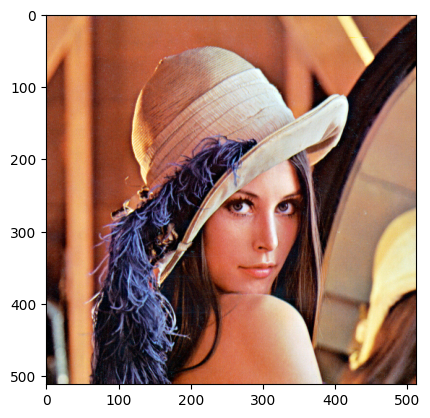

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

data = imread("lena.jpg")
print(data.shape)

plt.imshow(data)
plt.show()

In [ ]:
import numpy as np

l = [[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]], [[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]]
arr = np.asarray(l)

print(arr.shape)
arr2 = arr[:,:,2][0]
print(arr2.shape)
print(arr2)

(2, 4, 3)
(4,)
[3 3 3 3]


In [ ]:
from scipy.fft import fft2, ifft2, fftshift

# split with each color channel
datar = data[:, :, 0]
print(np.asarray(datar).shape)
datag = data[:, :, 1]
datab = data[:, :, 2]

# print(datar)

# fft 2D
datafftr = fftshift(fft2(datar))
print(np.asarray(datafftr).shape)
datafftg = fftshift(fft2(datag))
datafftb = fftshift(fft2(datab))

# print(datafftr)

(512, 512)
(512, 512)


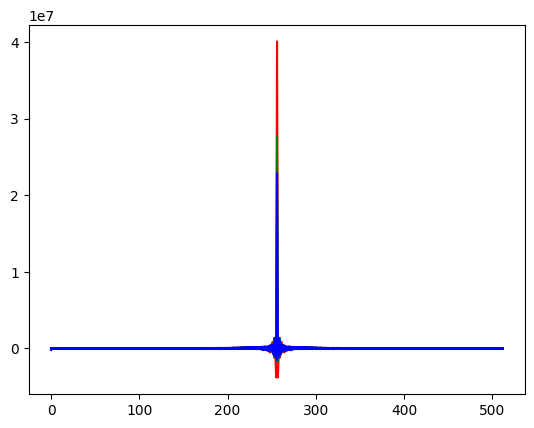

In [ ]:
plt.plot(datafftr, "r")
plt.plot(datafftg, "g")
plt.plot(datafftb, "b")
plt.show()

<ipython-input-312-3f248d03bf35>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.int_(datafft))


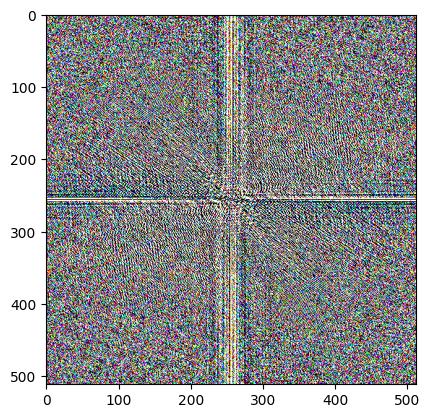

In [ ]:
datafft = np.dstack((datafftr, datafftg, datafftb))
plt.imshow(np.int_(datafft))

<ipython-input-313-698f925e0ea0>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  idata = np.int_(np.asarray(idata))


(512, 512, 3)


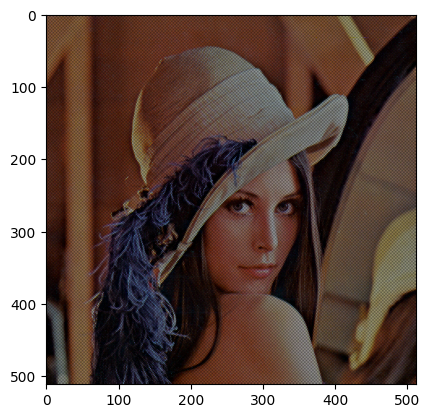

In [ ]:
idatar = ifft2(datafftr)
idatag = ifft2(datafftg)
idatab = ifft2(datafftb)

idata = np.dstack((idatar, idatag, idatab))
idata = np.int_(np.asarray(idata))
print(idata.shape)

plt.imshow(idata)

<ipython-input-314-dfa8a253a0bf>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.int_(datafft))


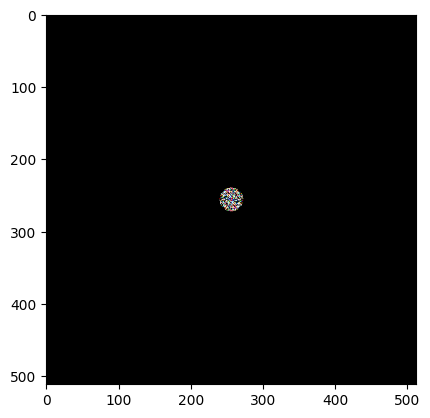

In [ ]:
# low pass filter
lenx = data.shape[0]
leny = data.shape[1]
maskLP = np.zeros((lenx, leny), dtype=bool)
for i in range(lenx) :
  for j in range(leny) :
    # https://www.youtube.com/watch?v=ylj0YaonHQk
    maskLP[i][j] = ((i-lenx/2)**2+(j-leny/2)**2>lenx*leny/999)

datafftr[maskLP] = 0
datafftg[maskLP] = 0
datafftb[maskLP] = 0
datafft = np.dstack((datafftr, datafftg, datafftb))
plt.imshow(np.int_(datafft))

<ipython-input-315-698f925e0ea0>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  idata = np.int_(np.asarray(idata))


(512, 512, 3)


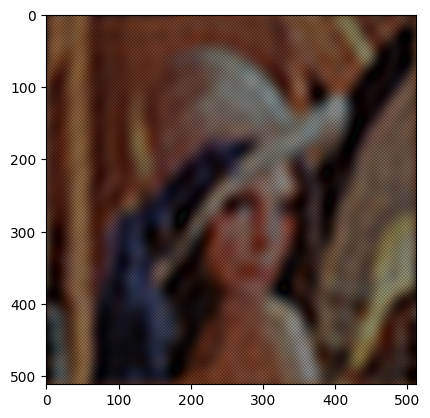

In [ ]:
idatar = ifft2(datafftr)
idatag = ifft2(datafftg)
idatab = ifft2(datafftb)

idata = np.dstack((idatar, idatag, idatab))
idata = np.int_(np.asarray(idata))
print(idata.shape)

plt.imshow(idata)